In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy

In [41]:
#for reece: C:\Users\eneto\Documents\GitHub\ASTR19-TidalReport\ASTR19_S22_group_project_data.txt
#for emma: "C:\Users\emmag\Documents\astro 19\ASTR19_S22_group_project_data.txt"
with open(r"C:\Users\emmag\Documents\astro 19\ASTR19_S22_group_project_data.txt") as file:
    data = file.read()

In [42]:
def parse_tide_data(data):
    rows = []
    for line in data.split('\n'):
        parts = line.split()
        if len(parts) == 3:
            day, time, height = parts
            rows.append({'Day': int(day), 'Time': time, 'Tide Height (feet)': float(height)})
    return pd.DataFrame(rows)

In [43]:
df = parse_tide_data(data)
print(df['Time'])

0      8:07
1     15:37
2      8:55
3     16:25
4      9:45
      ...  
77    11:15
78     4:29
79    12:22
80     5:21
81    13:14
Name: Time, Length: 82, dtype: object


In [5]:
from scipy import optimize
from scipy.optimize import curve_fit

In [6]:
# function that we have to fit the parameters to
def oscillatory_function(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

def oscillatory_function_2(x, a1, b1, c1, d1, a2, b2, c2, d2):
    return a1*np.sin(b1*x+c1)+d1 + a2*np.sin(b2*x+c2)+d2

def oscillatory_function_3(x, a1, b1, c1, d1, a2, b2, c2, d2, a3, b3, c3, d3):
    return a1*np.sin(b1*x+c1)+d1 + a2*np.sin(b2*x+c2)+d2 + a3*np.sin(b3*x+c3)+d3
    

In [7]:
# converting time and hours to a decimal point
def time_to_hours(t):
    hours, minutes = map(int, t.split(':'))
    return hours + minutes / 60
df['Time (Hours)'] = df['Time'].apply(time_to_hours)
# creating a standardized timestamp that can be plotted on the x-axis
df['Timepoint'] = df['Day'] + df['Time (Hours)'] / 24

In [8]:
# initial guesses for the parameters in the oscillatory func, these will be updated by the curve_fit function
initial_guess = [5, 0.5, 0, 0]
second_guess = [5, 0.5, 0, 0,   5, 2*np.pi, 1, 0]
third_guess = [5, 0.5, 0, 0,   5, 2*np.pi, 1, 0,  1, 0.3*np.pi, 1*np.pi, 0]

In [9]:
params, params_cov = optimize.curve_fit(oscillatory_function, df['Timepoint'], df['Tide Height (feet)'],
                      sigma=np.full(len(df), 0.25),p0=initial_guess)

params2, params2_cov = optimize.curve_fit(oscillatory_function_2, df['Timepoint'], df['Tide Height (feet)'],
                      sigma=np.full(len(df), 0.25),p0=second_guess)

params3, params3_cov = optimize.curve_fit(oscillatory_function_2, df['Timepoint'], df['Tide Height (feet)'],
                      sigma=np.full(len(df), 0.25),p0=second_guess)

firstfit = oscillatory_function(df['Timepoint'], *params)
secondfit = oscillatory_function_2(df['Timepoint'], *params2)
thirdfit = oscillatory_function_2(df['Timepoint'], *params3)

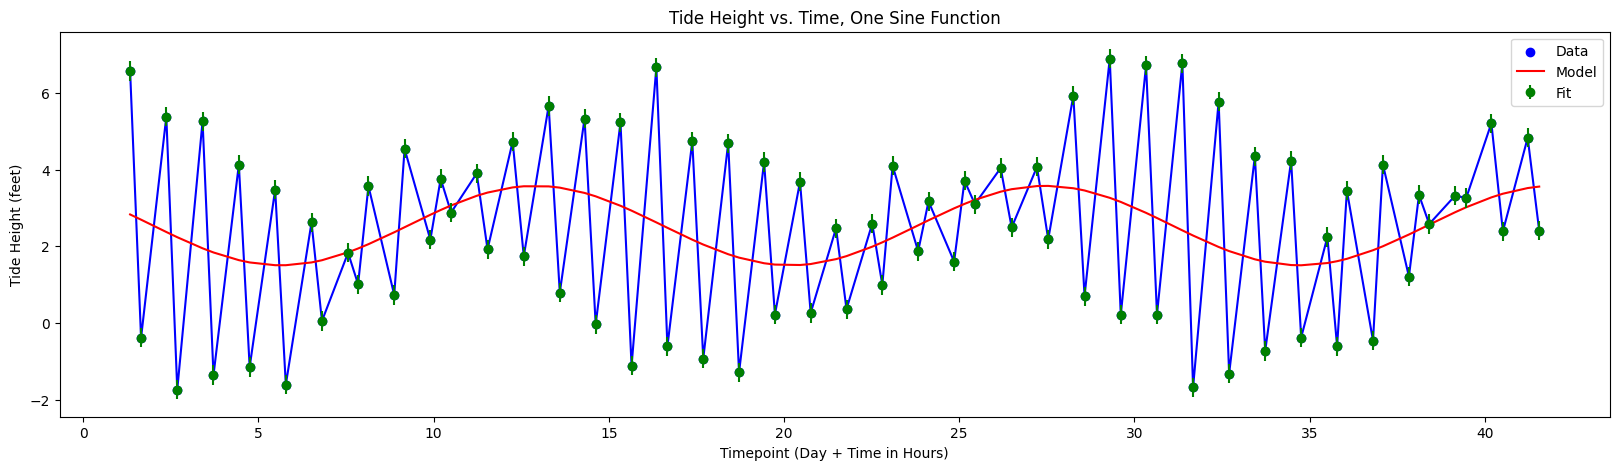

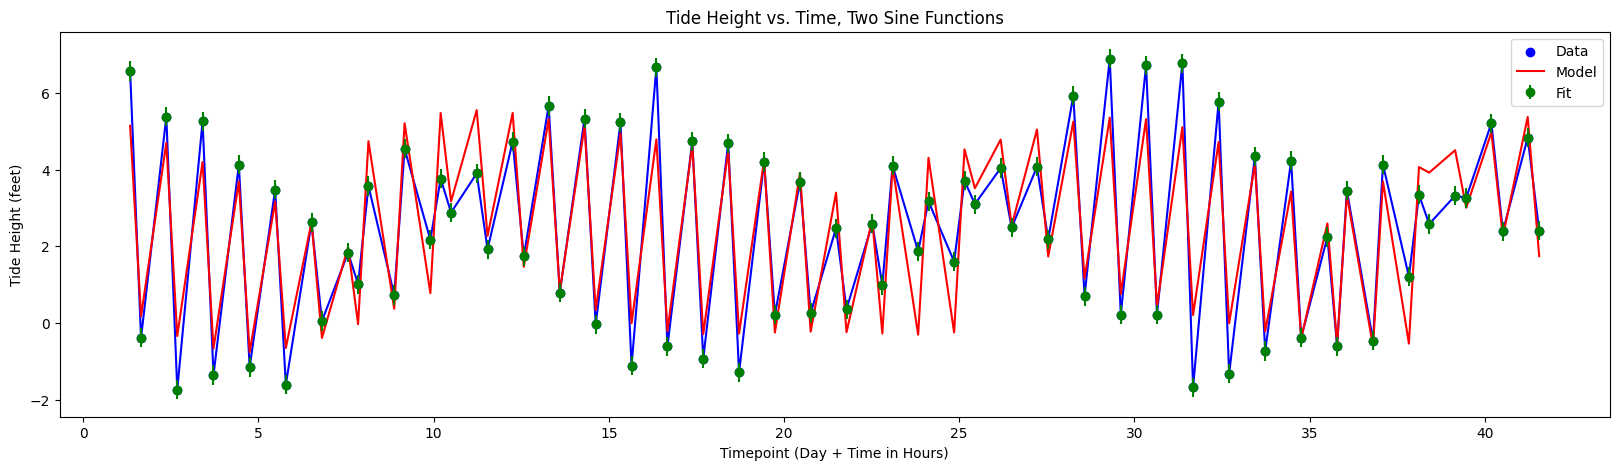

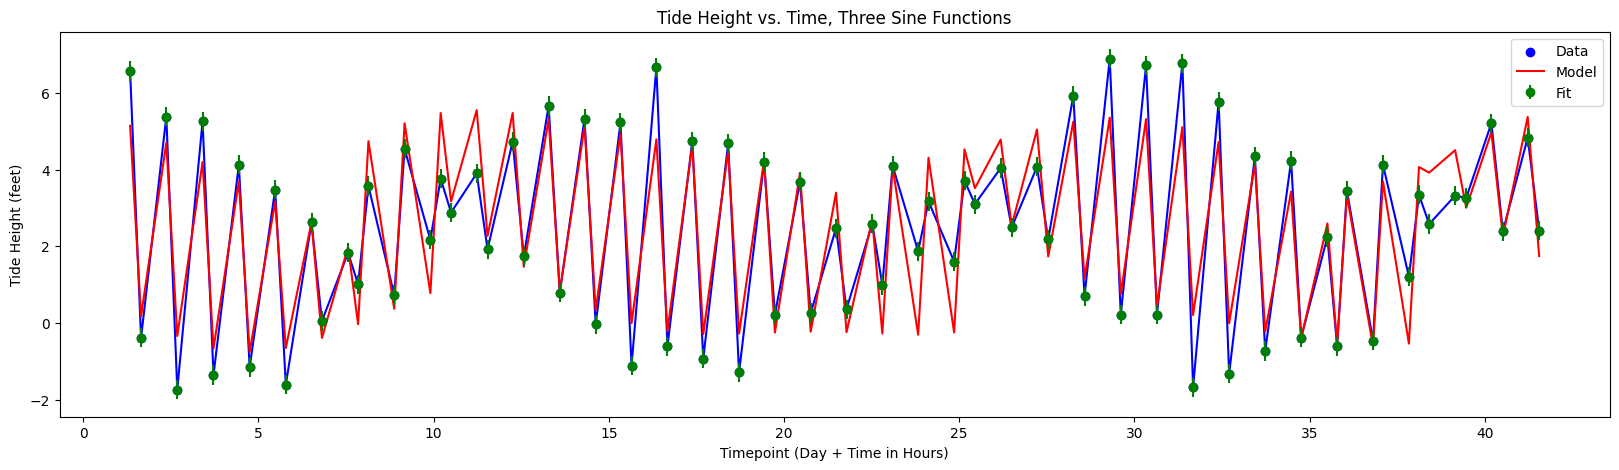

In [10]:
y_err=np.full(82,.25)
plt.figure(figsize=(20, 5))
plt.scatter(df['Timepoint'], df['Tide Height (feet)'], label='Data', color='blue')
plt.plot(df['Timepoint'], df['Tide Height (feet)'], color='blue') #shows what the fit should be modeled after, remove after fit is fixed
plt.plot(df['Timepoint'], firstfit, label='Model', color='red') 
plt.errorbar(df['Timepoint'], df['Tide Height (feet)'],yerr=y_err,fmt='o', label='Fit', color='green')

plt.xlabel('Timepoint (Day + Time in Hours)')
plt.ylabel('Tide Height (feet)')
plt.title('Tide Height vs. Time, One Sine Function')
plt.legend()

y_err=np.full(82,.25)
plt.figure(figsize=(20, 5))
plt.scatter(df['Timepoint'], df['Tide Height (feet)'], label='Data', color='blue')
plt.plot(df['Timepoint'], df['Tide Height (feet)'], color='blue') #shows what the fit should be modeled after, remove after fit is fixed
plt.plot(df['Timepoint'], secondfit, label='Model', color='red') 
plt.errorbar(df['Timepoint'], df['Tide Height (feet)'],yerr=y_err,fmt='o', label='Fit', color='green')

plt.xlabel('Timepoint (Day + Time in Hours)')
plt.ylabel('Tide Height (feet)')
plt.title('Tide Height vs. Time, Two Sine Functions')
plt.legend()

y_err=np.full(82,.25)
plt.figure(figsize=(20, 5))
plt.scatter(df['Timepoint'], df['Tide Height (feet)'], label='Data', color='blue')
plt.plot(df['Timepoint'], df['Tide Height (feet)'], color='blue') #shows what the fit should be modeled after, remove after fit is fixed
plt.plot(df['Timepoint'], thirdfit, label='Model', color='red') 
plt.errorbar(df['Timepoint'], df['Tide Height (feet)'],yerr=y_err,fmt='o', label='Fit', color='green')

plt.xlabel('Timepoint (Day + Time in Hours)')
plt.ylabel('Tide Height (feet)')
plt.title('Tide Height vs. Time, Three Sine Functions')
plt.legend()

Okay, it seems like two sine functions are the way to go.

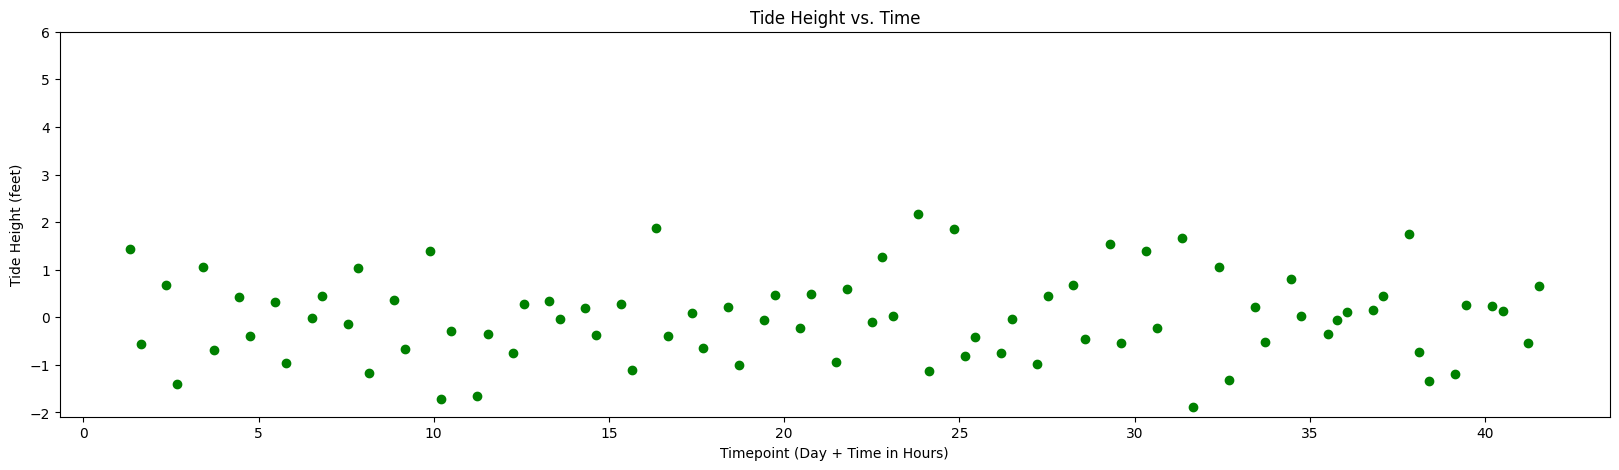

In [11]:
sub = df['Tide Height (feet)']-secondfit
plt.figure(figsize=(20,5))
plt.scatter(df['Timepoint'],sub,color="green")
#plt.plot(df['Timepoint'],sub,label='Subtraction',color="green")
plt.xlabel('Timepoint (Day + Time in Hours)')
plt.ylabel('Tide Height (feet)')
plt.yticks(ticks=(np.arange(-2,7,1)))
plt.title('Tide Height vs. Time')
#plt.legend()
plt.show()

The standard deviation of the residuals is 0.8906930244023186 ft, which is greater than the assumed experimental error, 0.25 ft.


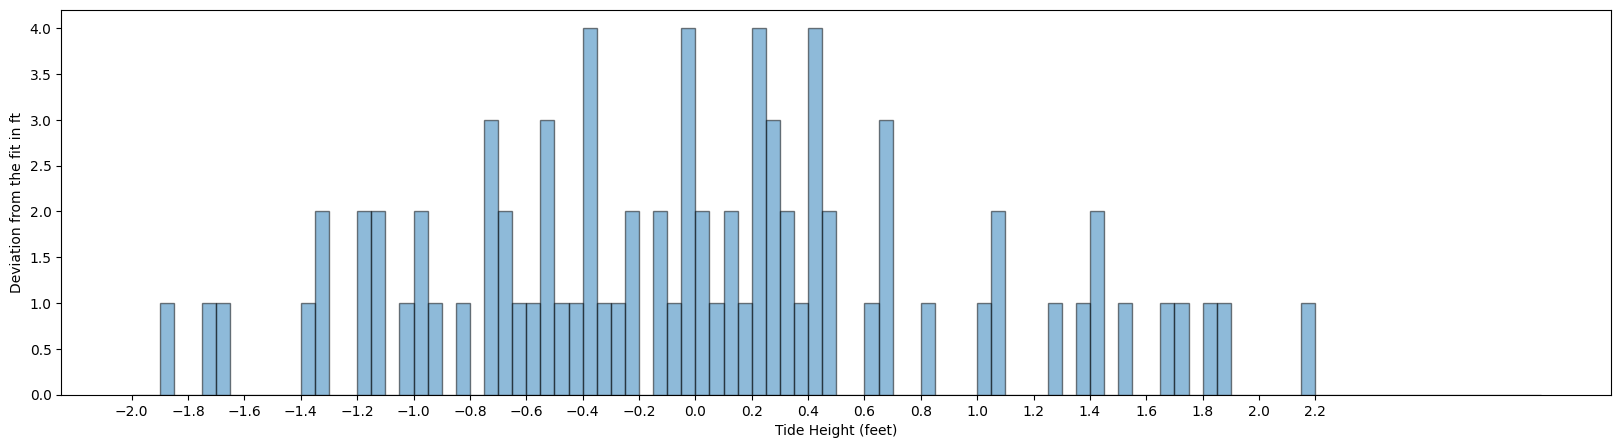

In [12]:
plt.figure(figsize=(20,5))
width=.05
histmin=np.floor(min(sub))
histmax=np.ceil(max(sub))+width
bins=np.arange(histmin,histmax,width)
plt.hist(sub,bins=bins,alpha=.5,edgecolor='black')
plt.ylabel('Deviation from the fit in ft')
plt.xlabel('Tide Height (feet)')
plt.xticks(ticks=(np.arange(-2,2.4,.2)))
plt.savefig('hist.png',bbox_inches='tight',dpi=600)
print(f'The standard deviation of the residuals is {np.std(sub)} ft, which is greater than the assumed experimental error, 0.25 ft.')

Looking really good, Reece!

In [13]:
#"intrinsic variance is obtained as the difference of the data variance minus the variance due to measurement errors."
intrinsic_variance1 = np.var(df['Tide Height (feet)']) - 0.25**2
print(f"The intrinsic scatter of the original data is estimated to be {intrinsic_variance1}.")

#alternatively, if it's asking for the intrinsic scatter of it post-model:
intrinsic_variance2 = np.var(sub) - 0.25**2
print(f"The intrinsic scatter of the residuals is estimated to be {intrinsic_variance2}.")

The intrinsic scatter of the original data is estimated to be 5.604950743604996.
The intrinsic scatter of the residuals is estimated to be 0.7308340637189492.


The standard deviation of the residuals is 0.9226715487740998 ft, which is greater than the assumed experimental error, 0.25 ft.
The significance of the outlier on the 14th day is 7.9443221260468535 sigma.


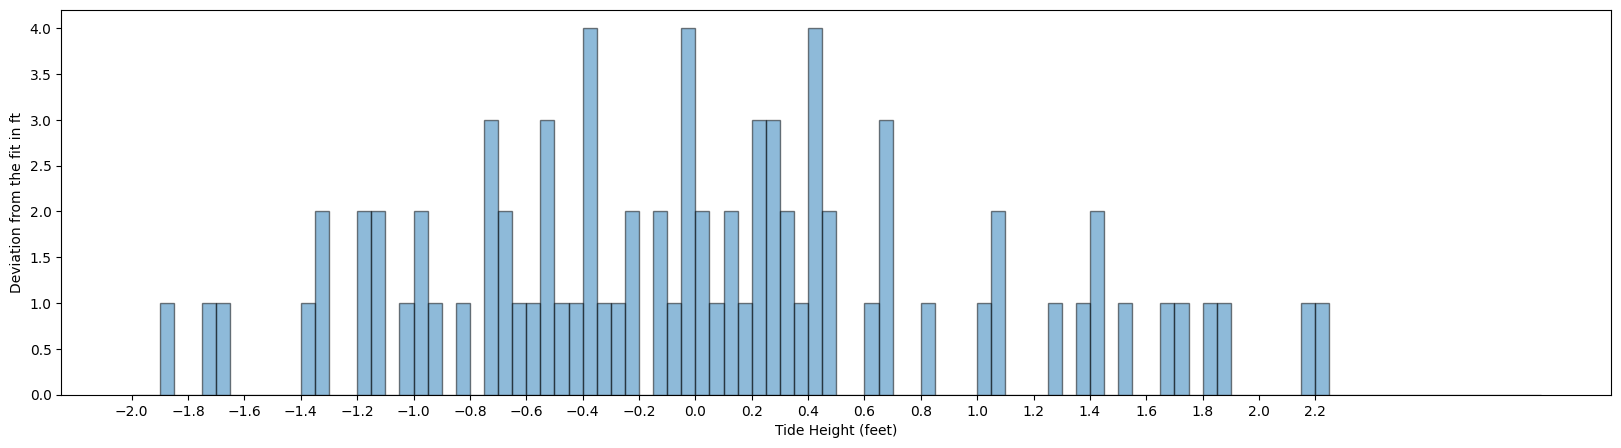

In [63]:
df.iat[26,2] = 7.33
sub = df['Tide Height (feet)']-secondfit
stddev = np.std(sub)
plt.figure(figsize=(20,5))
width=0.05
histmin=np.floor(min(sub))
histmax=np.ceil(max(sub))+width
bins=np.arange(histmin,histmax,width)
plt.hist(sub,bins=bins,alpha=.5,edgecolor='black')
plt.ylabel('Deviation from the fit in ft')
plt.xlabel('Tide Height (feet)')
plt.xticks(ticks=(np.arange(-2,2.4,.2)))
plt.savefig('hist.png',bbox_inches='tight',dpi=600)
print(f'The standard deviation of the residuals is {stddev} ft, which is greater than the assumed experimental error, 0.25 ft.')
print(f"The significance of the outlier on the 14th day is {7.33/stddev} sigma.")